<a href="https://colab.research.google.com/github/shaiksahil1088/FUTURE_ML_01/blob/main/AI_Powered_Sales_Forecasting_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df = pd.read_csv('Superstore.csv',encoding = 'latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df['Order Date Parsed'] = pd.to_datetime(df['Order Date'], errors='coerce',infer_datetime_format=True)
df.dropna(subset=['Order Date Parsed'])
df['Sales'] = pd.to_numeric(df['Sales'],errors='coerce')
df.dropna(subset=['Sales'])

/tmp/ipython-input-1533060655.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Order Date Parsed'] = pd.to_datetime(df['Order Date'], errors='coerce',infer_datetime_format=True)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Parsed
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11-08
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11-08
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06-12
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10-11
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,NaT
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,NaT
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,NaT
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,NaT


In [7]:
df['MonthStart'] =df['Order Date Parsed'].values.astype('datetime64[M]')
monthly = (
    df.groupby('MonthStart')['Sales']
    .sum()
    .reset_index()
    .rename(columns={'MonthStart':'ds','Sales':'y'})
    .sort_values('ds')
)

In [8]:
model = Prophet(yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(monthly)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0jsvvdg/lis71hgx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0jsvvdg/i424t4zv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61884', 'data', 'file=/tmp/tmpx0jsvvdg/lis71hgx.json', 'init=/tmp/tmpx0jsvvdg/i424t4zv.json', 'output', 'file=/tmp/tmpx0jsvvdg/prophet_model_h57tf2q/prophet_model-20251025142724.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:27:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=12,freq='MS')
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,141.709080,-7689.042048,18659.673902,141.709080,141.709080,5947.225423,5947.225423,5947.225423,57.160969,57.160969,57.160969,5890.064454,5890.064454,5890.064454,0.0,0.0,0.0,6088.934502
1,2014-02-01,554.970613,-12860.161707,14395.349089,554.970613,554.970613,-189.572515,-189.572515,-189.572515,811.031941,811.031941,811.031941,-1000.604455,-1000.604455,-1000.604455,0.0,0.0,0.0,365.398098
2,2014-03-01,928.239094,-13834.181174,12257.195211,928.239094,928.239094,-1770.765051,-1770.765051,-1770.765051,-904.673376,-904.673376,-904.673376,-866.091675,-866.091675,-866.091675,0.0,0.0,0.0,-842.525957
3,2014-04-01,1341.500627,-14321.435844,13210.570408,1341.500627,1341.500627,-1532.106572,-1532.106572,-1532.106572,-1018.011135,-1018.011135,-1018.011135,-514.095437,-514.095437,-514.095437,0.0,0.0,0.0,-190.605945
4,2014-05-01,1741.431143,-12150.698557,13280.634200,1741.431143,1741.431143,-1092.526078,-1092.526078,-1092.526078,-904.673376,-904.673376,-904.673376,-187.852702,-187.852702,-187.852702,0.0,0.0,0.0,648.905065
5,2014-06-01,2154.692676,-12513.898192,14689.541976,2154.692676,2154.692676,-1055.256593,-1055.256593,-1055.256593,-1018.011135,-1018.011135,-1018.011135,-37.245457,-37.245457,-37.245457,0.0,0.0,0.0,1099.436084
6,2014-07-01,2554.623192,-11706.013807,15039.044122,2554.623192,2554.623192,-917.241199,-917.241199,-917.241199,-904.673376,-904.673376,-904.673376,-12.567823,-12.567823,-12.567823,0.0,0.0,0.0,1637.381993
7,2014-08-01,2967.884725,-11446.243930,15623.406526,2967.884725,2967.884725,-1142.412659,-1142.412659,-1142.412659,-1018.011135,-1018.011135,-1018.011135,-124.401524,-124.401524,-124.401524,0.0,0.0,0.0,1825.472066
8,2014-09-01,3381.146258,-10896.182249,15441.030603,3381.146258,3381.146258,-1232.308393,-1232.308393,-1232.308393,-907.209862,-907.209862,-907.209862,-325.098531,-325.098531,-325.098531,0.0,0.0,0.0,2148.837864
9,2014-10-01,3781.076773,-10919.328951,16175.246863,3781.076773,3781.076773,-1649.729640,-1649.729640,-1649.729640,-1018.011135,-1018.011135,-1018.011135,-631.718505,-631.718505,-631.718505,0.0,0.0,0.0,2131.347134


In [10]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].to_csv("prophet_forecast_12mo.csv",index=False)

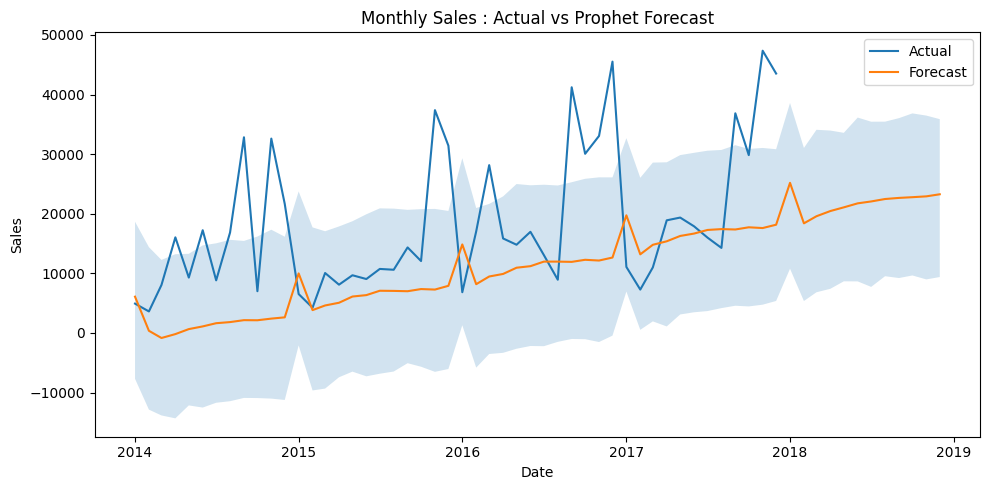

In [11]:
plt.figure(figsize=(10,5))
plt.plot(monthly['ds'],monthly['y'],label="Actual")
plt.plot(forecast['ds'],forecast['yhat'],label="Forecast")
plt.fill_between(forecast['ds'],forecast['yhat_lower'],forecast['yhat_upper'],alpha=0.2)
plt.title("Monthly Sales : Actual vs Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.savefig("prophet_actual_vs_forecast.png")
plt.show()

In [12]:
from prophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(model,initial='730 days',period='180 days',horizon='365 days')
df_p = performance_metrics(df_cv)
print(df_p.head())

INFO:prophet:Making 2 forecasts with cutoffs between 2016-06-04 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0jsvvdg/w1kalwwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0jsvvdg/x4r8dshg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20210', 'data', 'file=/tmp/tmpx0jsvvdg/w1kalwwx.json', 'init=/tmp/tmpx0jsvvdg/x4r8dshg.json', 'output', 'file=/tmp/tmpx0jsvvdg/prophet_modelez_hbd6f/prophet_model-20251025142740.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0jsvvdg/88i9ev_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpx0jsvvdg/ek6js79l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:ru

  horizon           mse          rmse           mae      mape     mdape  \
0 31 days  1.436994e+08  11987.470209  11030.798366  0.952393  0.952393   
1 58 days  1.816229e+08  13476.754202  13247.330362  1.312712  1.312712   
2 62 days  2.591446e+08  16097.967918  15413.943465  1.980854  1.980854   
3 89 days  4.259970e+08  20639.694057  20631.682727  1.635150  1.635150   
4 90 days  3.663126e+08  19139.293994  19013.181627  1.021959  1.021959   

      smape  coverage  
0  0.610388       0.5  
1  0.791275       0.5  
2  0.955617       0.5  
3  0.925845       0.0  
4  0.779715       0.0  


In [13]:
top_products = (
    df.groupby('Product Name')['Sales']
    .sum()
    .reset_index()
    .sort_values(by='Sales',ascending=False)
    .head(10)
)
top_products.to_csv("top_10_products.csv",index=False)

In [14]:
df['Year']=df["Order Date Parsed"].dt.year
df['Month']=df["Order Date Parsed"].dt.month_name()

sales_year_month=(
    df.groupby(['Year','Month'])['Sales']
    .sum()
    .reset_index()
    .sort_values(['Year','Month'])
)
sales_year_month.to_csv("sales_by_year_month.csv",index=False)

In [15]:
category_region=(
    df.groupby(['Year','Month'])['Sales']
    .sum()
    .reset_index()
    .sort_values("Sales",ascending=False)
)
category_region.to_csv("category_region_sales.csv",index=False)